In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#loading the dataset
df=pd.read_csv('/content/data-set for decision tree.csv')
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [27]:
#replacing ? with nan to fill empety values
df.replace('?',np.nan,inplace=True)
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [28]:
df.isnull().sum()

,0
workclass,1836
education,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0
native.country,583
income,0


In [45]:
#treating missing values using mode in catagourical columns
Mode=df['workclass'].mode()
df['workclass'].fillna(Mode[0],inplace=True)
Mode=df['occupation'].mode()
df['occupation'].fillna(Mode[0],inplace=True)
Mode=df['native.country'].mode()
df['native.country'].fillna(Mode[0],inplace=True)
print("Missing Values filled")


Missing Values filled


<ipython-input-45-cbe417bbb875>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(Mode[0],inplace=True)
<ipython-input-45-cbe417bbb875>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [30]:
df.isnull().sum().sum()

0

In [31]:
#label encoding for numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
catagourical_Columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
for column in catagourical_Columns:
  df[column]=le.fit_transform(df[column])

In [32]:
df.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.094438,10.298210,2.611836,6.138755,1.446362,3.665858,0.669205,36.417155
std,1.107194,3.870264,1.506222,3.972708,1.606771,0.848806,0.470506,6.056047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,38.000000
50%,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000
75%,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000
max,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000


In [33]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Treating outliers using the IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers treated successfully!")


Outliers treated successfully!


Applying Decision Tree model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
model=DecisionTreeClassifier()

In [36]:
x=df.drop("income",axis=1)
y=df["income"]

In [37]:
#splitting in to training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

In [38]:
#training the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
#testing
model.predict(x_test)
accuracy=accuracy_score(y_test,model.predict(x_test))

In [40]:
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.81


In [41]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,10))
# plot_tree(model,filled=True,feature_names=x.columns,class_names=['<=50K','>50K'])
# plt.show()

A presentable Tree With adjested depth

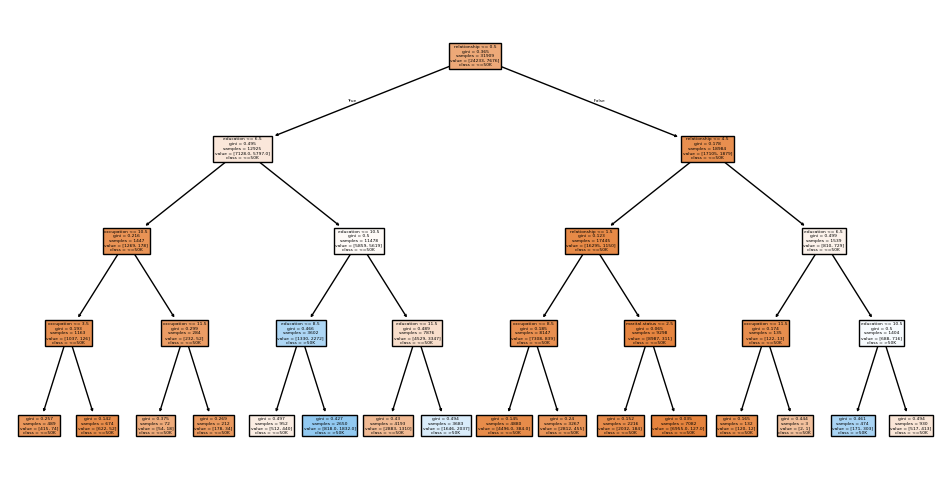

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a Decision Tree with max depth to control size
model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Adjust depth as needed
model.fit(x_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 6))  # Reduce figure size for readability
#X should be x
plot_tree(model, filled=True, feature_names=x.columns, class_names=['<=50K', '>50K'])
plt.show()